# Loan Predictions using Machine Learning in Python

### Author - Kalyani Nawathe 
### Date - December 13, 2018

## The problem statement: 
For its customers, Dream Housing Finance company deals in home loans. They have their business across all urban, semi-urban and rural areas. Company validates the customer eligibility for the loan after the customer applies for a home loan.

For loan eligibility process, the company wants to automate the process based on customer detail provided while filling an online application form. Details include Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

The objective of this project to automate the process to identify the customers' segments, those who are eligible for loan payment so that they can specifically focus these eligible customers.


## Dataset details:
Data
Parameters        | Description of parameter

Loan_ID           | Unique Loan ID

Gender            | Male/ Female

Married           | Applicant married (Y/N)

Dependents        | Number of dependents

Education         | Applicant Education (Graduate/ Under Graduate)

Self_Employed     | Self employed (Y/N)

ApplicantIncome   | Applicant income

CoapplicantIncome | Coapplicant income

LoanAmount        | Loan amount in thousands

Loan_Amount_Term  | Term of loan in months

Credit_History    | Credit history meets guidelines

Property_Area     | Urban/ Semi Urban/ Rural

Loan_Status       | Loan approved (Y/N)


### Source: 
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Explanation of the problem:
- In real-life, Loan prediction is a very common problem that each retail bank faces everyday. It can save a lot of man hours for a bank if perfomed efficiently with accuracy.
- This is a classification problem where we have to predict whether a loan would be approved or not. In a classification, we have to predict discrete dependent values based on a given set of independent variables. 

## Hypothesis generation:
The target variable for this problem is **Loan Approval.** By understanding the problem statement I can think of below factors which I think can affect the loan approval.
1. **Applicant Income** - chances of approval of loan are higher for applicants with high income.
2. **Loan Amount** - chances of approval of loan are higher for applicants with less loan amount applied for.
3. **Loan Term** - chances of approval of loan are higher for applicants who applied for less time period and less amount.
4. **Credit history** - chances of approval of loan are higher for applicants who have good credit history i.e. they repayed their previous debts.

## Approach taken for hypothesis:
- For the **hypothesis** problems mentioned above, I am going to perform this analysis with the help of **Visualizations** by performing **Univariate** as well as **Bivariate Analysis** where I am going to analyze data for each individual variable separately and some of them together.
- For categorical parameters I am using frequency table or bar plots which will calculate the number of each category in a particular variable. 
- For numerical parameters, I am using probability density plots which can be used to look at the distribution of the variable.

## Approach taken for predictions:
- As the main goal of this project is to predict if an applicant's loan will be approved or not along with doing statistical/descriptive analysis of the data, I am going to implement prediction model using **Logistic Regression model** 
- Because Logistic Regression is a classification algorithm which is used to predict a **Binary Outcomes** (1 / 0, Yes / No, True / False) given a set of independent variables.
***


### Import all required packages

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

## 1. Data extraction and exploration

In [2]:
# Read datasets
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

##### - Making a copy of train and test data so that we would not lose the original datasets, even if we make any changes in these datasets .

In [3]:
# Get copy of original
train_original=data.copy()
test_original=test.copy()

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

- Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

In [6]:
# Print data types for each variable
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Print summary statistics on each variable.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Analyze data structure
print(f'There are {data.shape[0]:d} datapoints with {data.shape[1]:d} variable in train dataset.')
print(f'There are {test.shape[0]:d} datapoints with {test.shape[1]:d} variable in test dataset.')

There are 614 datapoints with 13 variable in train dataset.
There are 367 datapoints with 12 variable in test dataset.


#### Observe the correlation between above parameters for initial exploration

In [9]:
# Chnaging 0 and 1 for N and Y resp in loan status variable
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

# Change 3+ to 3 in train and test both
data['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

In [10]:
# Correlation plot for initial exploration
corr = data.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def heatmap():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "13pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '13pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover over to magnify")\
    .set_precision(2)\
    .set_table_styles(heatmap())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1,-0.12,0.57,-0.045,-0.015,-0.0047
CoapplicantIncome,-0.12,1,0.19,-0.06,-0.0021,-0.059
LoanAmount,0.57,0.19,1,0.039,-0.0084,-0.037
Loan_Amount_Term,-0.045,-0.06,0.039,1,0.0015,-0.021
Credit_History,-0.015,-0.0021,-0.0084,0.0015,1,0.56
Loan_Status,-0.0047,-0.059,-0.037,-0.021,0.56,1


- Here, we can observe that Applicant Income and Loan amount has positive correlation between them.
- Credit_History and Loan_Status are also correlated. 
- Loan Amount is also correlated with Co-applicant's Income.
***

## 2. Data cleanup and preparation

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#### Dropping unwanted columns 

In [12]:
# Drop the Loan_ID variable as it do not have any effect on the loan status
data = data.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#### Renaming columns 

In [13]:
# Setting new names
new_cols = {'ApplicantIncome': 'Applicant_Income',
            'CoapplicantIncome': 'Coapplicant_Income',
            'LoanAmount': 'Loan_Amount'}

# Renaming using pandas rename
data.rename(columns=new_cols, inplace=True)
test.rename(columns=new_cols, inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#### Removing/filling missing data

In [14]:
data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


- We can see that there are columns that have a minimum value of zero (0.00). On some columns, a value of zero does not make sense and indicates an invalid or missing value. 
- Let's first check if data has missing value and them treat them accordingly

#### Check all variables missing values count

In [15]:
# count the number of missings in each column
print(data.isnull().sum())

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64


#### Treat the missing data in categorical variables by imputation using mode

In [16]:
# Replace missing values with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
print(data.isnull().sum())

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64


- There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed variables so I impyted them using the mode of the variable. Now you can see that there are 0 null for them except Loan_Amount and Loan_Amount_Term which are important variables in our analysis
***

#### Treat Loan_Amount feature

In [17]:
# Replace missing values with median
data['Loan_Amount'].fillna(data['Loan_Amount'].median(), inplace=True)

- I filled median for missing loan amounts as there are outliers in data, it is not good idea to impute loan amount with mode, that's why I imputed it with median of the Loan_Amount variable
***

#### Treat Loan_Amount_Term feature

In [18]:
# Get calue count
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In the Loan_Amount_Term variable, the value of 360 is repeating (512 times) the most. That's why I am replacing the missing values in Loan_Amount_Term variable using the mode of this variable.

In [19]:
# Replace missing values with mode
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [20]:
# Check data for null/missing values
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Finally all the missing values in the training dataset are treated correctly.

#### Treating the outliers in Loan_Amount

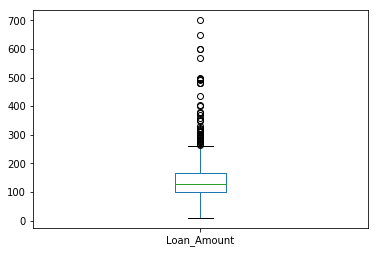

In [21]:
# Analyze variable to treat
data['Loan_Amount'].plot.box()
plt.show()

- As we can see that there are lots of outliers in Loan Amount variable, I am doing the log transformation of its data as, taking the log transformation, it does not affect the smaller values much, but reduces the larger values. So, I will get a distribution similar to normal distribution.

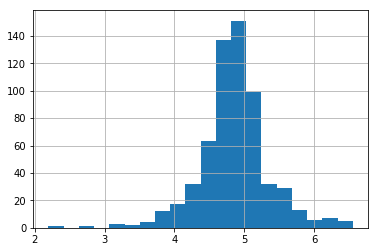

In [22]:
# Treat outliers
data['Loan_Amount_Log'] = np.log(data['Loan_Amount'])
data['Loan_Amount_Log'].hist(bins=20)

- Now the distribution looks much similar to normal distribution and effect of outliers has been significantly reduced.

#### Treat test dataset similarly

In [23]:
# Similar changes in test set
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount'].fillna(test['Loan_Amount'].median(), inplace=True)

In [24]:
test['Loan_Amount_Log'] = np.log(test['Loan_Amount'])

In [25]:
test.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Amount_Log       0
dtype: int64

- Now our missing values and outliers are treated in test dataset as well
***

## 3. Data visualization 

### Observe relationship between each parameter and target variable

#### Analyze target variable first

In [26]:
data.shape

(614, 13)

In [27]:
# Gives count of Yes/No loan status
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

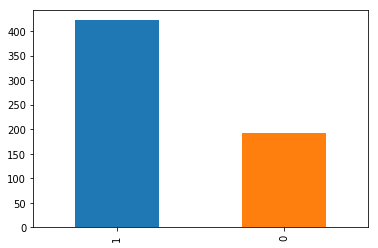

In [28]:
# Plot the counts of loan status
data['Loan_Status'].value_counts().plot.bar()

The loan of 422 people out of 614 was approved and 192 was not approved.

In [29]:
# Normalize is set to True to print percentage instead of number 
data['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

### Visualize Categorical and Ordinal variables

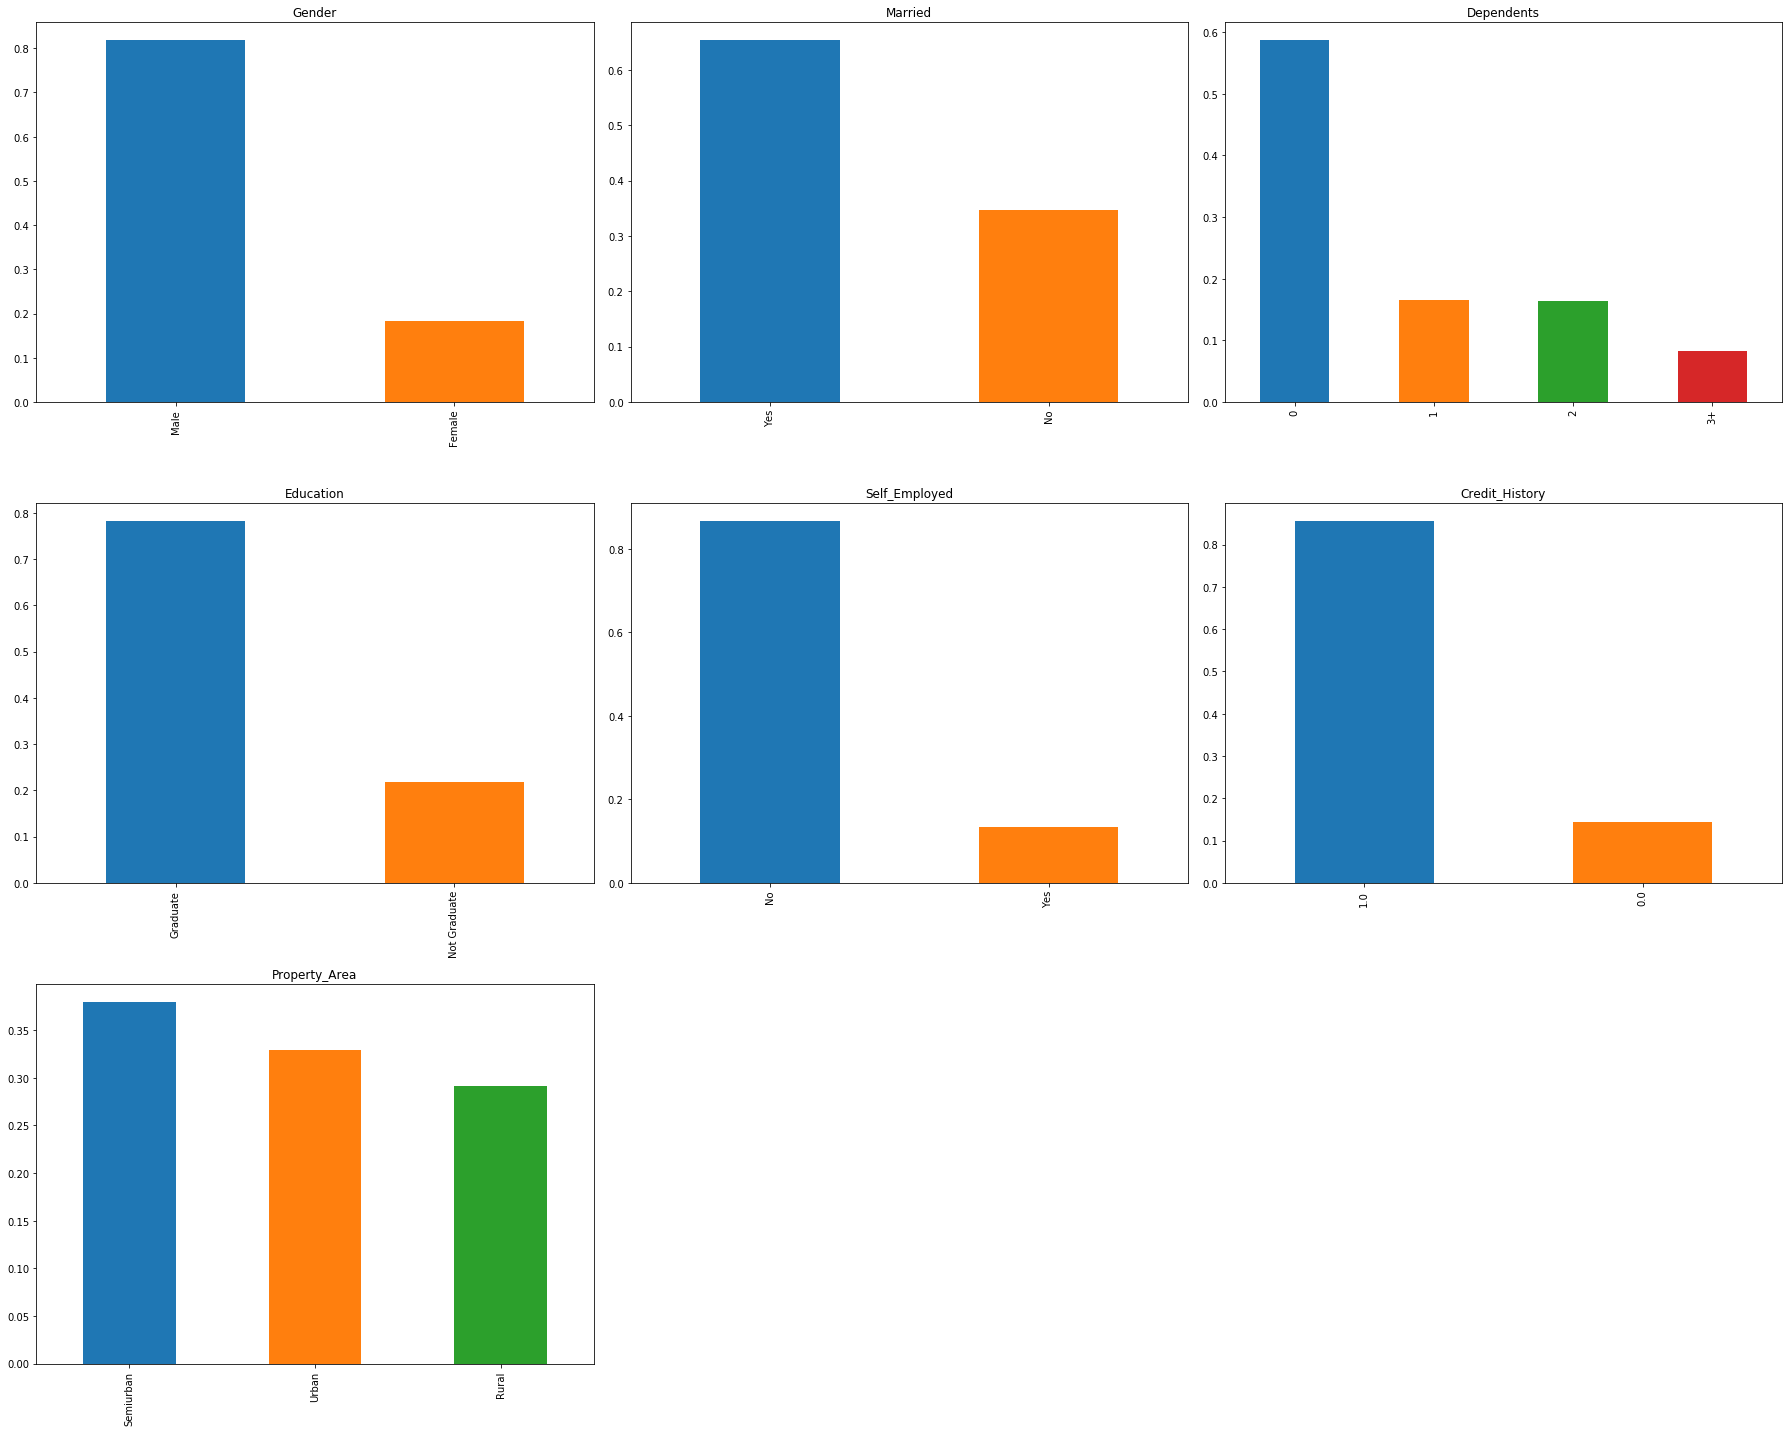

In [30]:
# Visualize each variable
plt.figure()
plt.subplot(331)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(25,20), title= 'Gender')

plt.subplot(332)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(333)
data['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')


plt.subplot(334)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(335)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')


plt.subplot(336)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(337)
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.tight_layout()
plt.show()

Following interpreations can be observed from above plots:

- About 80% of applicants are male and 20% are female.
- About 65% of the applicants are married and 35% are unmarried.
- For most applicants number of dependents is zero
- Graduate applicants are the most, around 80%.
- Around 83%% applicants are not self employed but 17% are self employed
- Around 82% applicants have repaid their debts and 18% have not
- Applicants from Semiurban area have applied for the more home loans as compared to Urban and Rural area.
***

### Visualize Numerical Variables

#### Observe Applicant_Income parameter

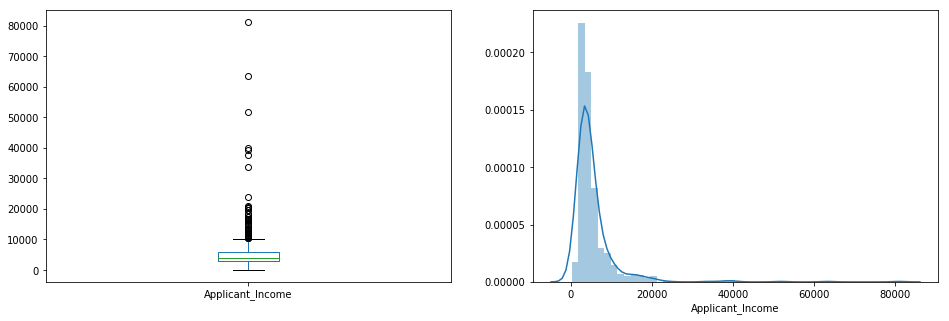

In [31]:
# Visualize/Analyze Applicant_Income feature
plt.figure(1)

plt.subplot(121)
data['Applicant_Income'].plot.box(figsize=(16,5));

plt.subplot(122)
sns.distplot(data['Applicant_Income'])

plt.show()

- It can be inferred from above plots that most of the data in the distribution of applicant income is right skewed which means it is not normally distributed.
- The boxplot shows the presence of a lot of outliers in the data. This can be attributed to the income disparity in the society. 
- Part of this can be driven by the fact that we are looking at people with different education levels or Property Areas . Let us segregate them by Education and Property Area

Text(0.5, 0.98, '')

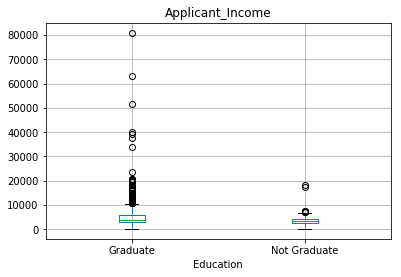

In [32]:
# Group by their Education levels
data.boxplot(column='Applicant_Income', by = 'Education')
plt.suptitle("")

- We can see that the outliers are appearing to be the graduates with a very high incomes.

Text(0.5, 0.98, '')

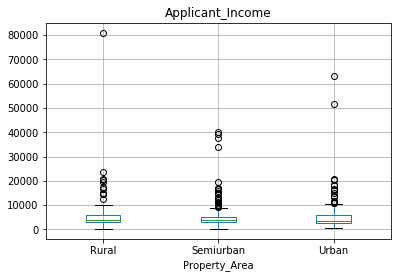

In [33]:
# Group by their Property areas
data.boxplot(column='Applicant_Income', by = 'Property_Area')
plt.suptitle("")

- However, the property area have nearly same number of outliers for all areas.
***

#### Observe Loan_Amount parameter

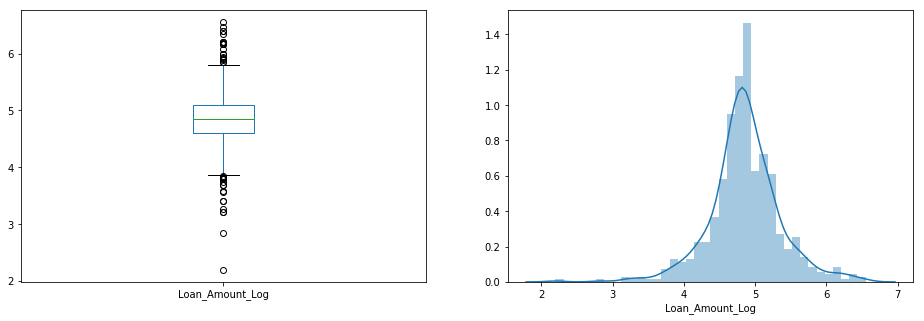

In [34]:
# Visualize/Analyze Loan_Amount feature
plt.figure(1)
plt.subplot(121)
data['Loan_Amount_Log'].plot.box(figsize=(16,5));

plt.subplot(122)
sns.distplot(data['Loan_Amount_Log'])

plt.show()

- The distribution is fairly normal for Loan_Amount.
- Now we would like to know how well each feature correlate with Loan Status.

## 4. Descriptive Analysis

Lets recall our hypothesis generated at start:

1. **Applicant Income** - chances of approval of loan are higher for applicants with high income.
2. **Loan Amount** - chances of approval of loan are higher for applicants with less loan amount applied for.
3. **Loan Term** - chances of approval of loan are higher for applicants who applied for less time period and less amount.
4. **Credit History** - chances of approval of loan are higher for applicants who have good credit history i.e. they repayed their previous debts.

Lets try to test the above mentioned hypotheses using bivariate analysis

### Independent Categorical Variables vs Target Variable

####  Note - Hypothesis of Credit History that "chances of approval of loan are higher for applicants who have good credit history i.e. they repayed their previous debts" will be checked here

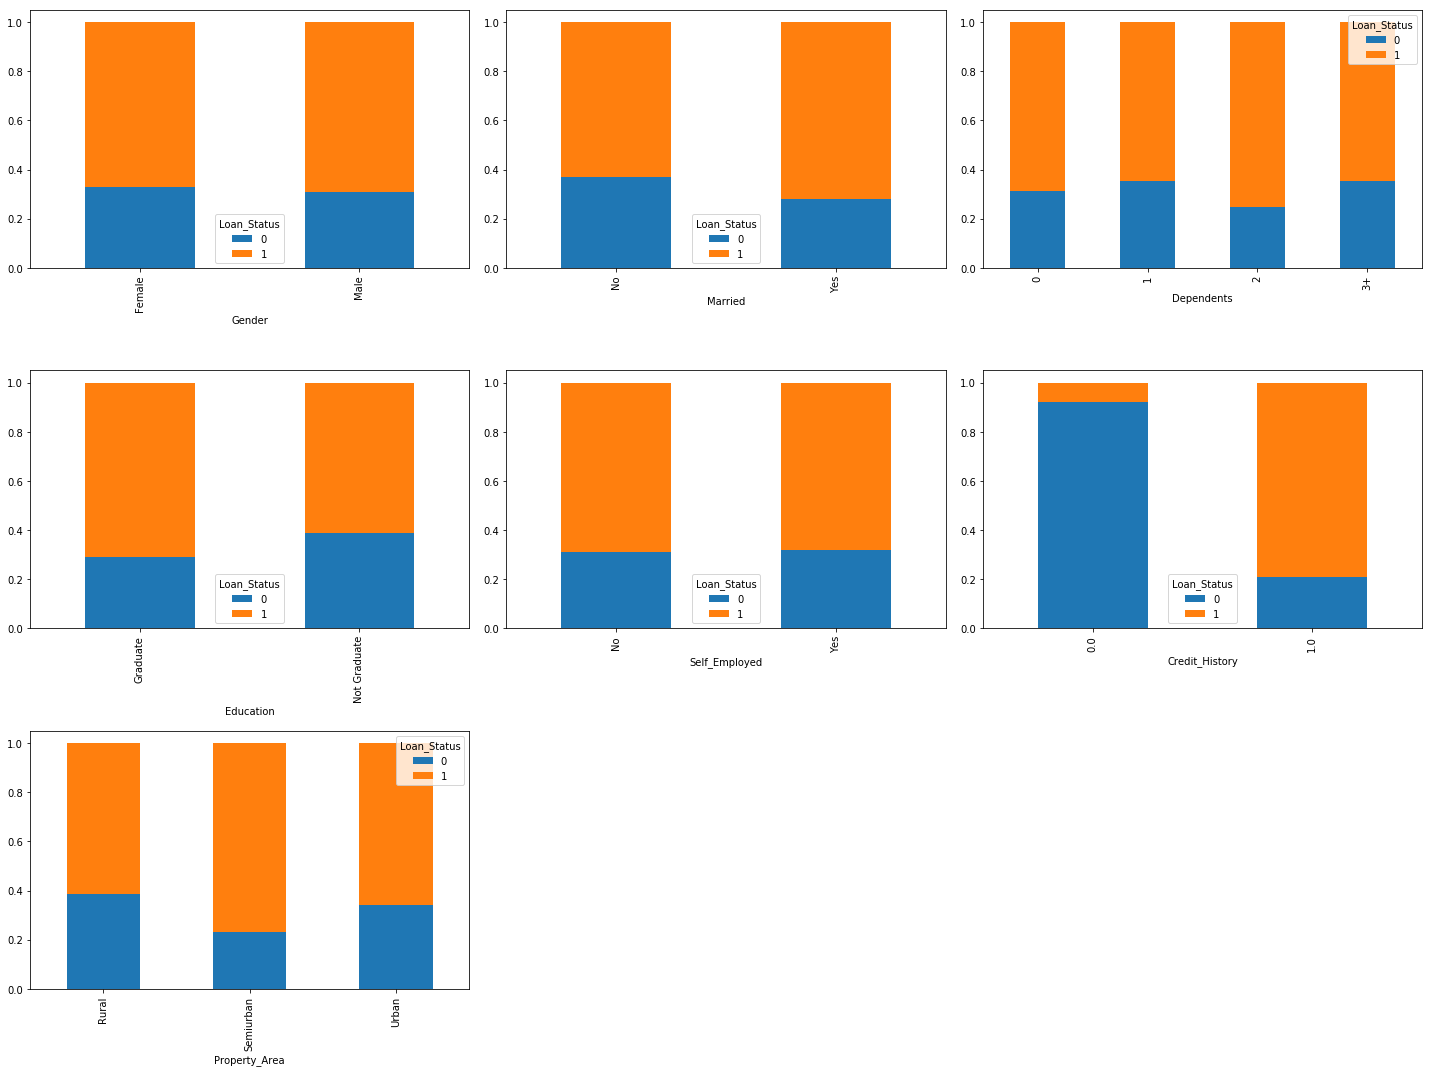

In [35]:
# Get values of variables
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Married=pd.crosstab(data['Married'],data['Loan_Status'])
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])

# Plot each variable
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(331)
Gender.div(Gender.sum(1).astype(float), axis=0).plot.bar(figsize=(20,15), stacked=True, ax=ax1)

ax2 = fig.add_subplot(332)
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax2)

ax3 = fig.add_subplot(333)
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax3)

ax4 = fig.add_subplot(334)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax4)

ax5 = fig.add_subplot(335)
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax5)

ax6 = fig.add_subplot(336)
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax6)

ax7 = fig.add_subplot(337)
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax7)

plt.tight_layout()
plt.show()

Followwing inferences can be made by looking at above plots: (0 - No, 1 - Yes)

- The percentage of male and female applicants is almost same for both approved and unapproved loans.
- Loans are approved more for married applicants.
- Nothing much can be inferred from Dependents distribution of applicants However, applicants with 1 or 3+ dependents have same proportions across both the categories of Loan_Status.
- Nothing significant we can be inferred from Self_Employed vs Loan_Status plot.
- In semiurban area percentage of loans getting approved is slighly higher as compared to that in rural or urban areas.
- **People who paid their debts i.e with credit history as 1 are most likely to get their loans approved. This supports one of our 4th hypothesis that chances of approval of loan are higher for applicants who have good credit history i.e. they repayed their previous debts..**

***

### Numerical Variables vs Target Variable

#### Note - Hypothesis of Applicant Income that "chances of approval of loan are higher for applicants with high income." will be checked here

##### Analyze Applicant Income variable. 
To look at their relationship we would require to divide amounts in some range

In [36]:
data['Applicant_Income'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: Applicant_Income, dtype: float64

In [37]:
# Divide into range for analysis
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
data['Income_range'] = pd.cut(data['Applicant_Income'], bins, labels=group)

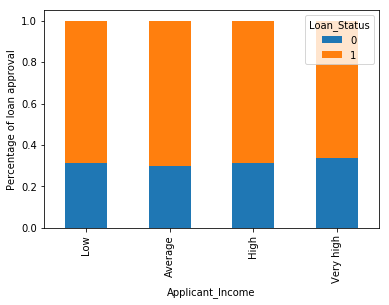

In [38]:
# plot in stacked bar for loan status
Income_range = pd.crosstab(data['Income_range'],data['Loan_Status'])
Income_range.div(Income_range.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Applicant_Income')
P = plt.ylabel('Percentage of loan approval')

- It can be observed from above stacked bar plot that the percentage of loan approval are not affected by Applicant's income which **contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.**

##### Analyze Co-applicant's Income variable 

In [39]:
data['Coapplicant_Income'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: Coapplicant_Income, dtype: float64

In [40]:
# Divide into range for analysis
bins=[0,1000,3000,42000]
group=['Low','Average','High']
data['Coapplicant_Income_range']=pd.cut(data['Coapplicant_Income'], bins, labels=group)

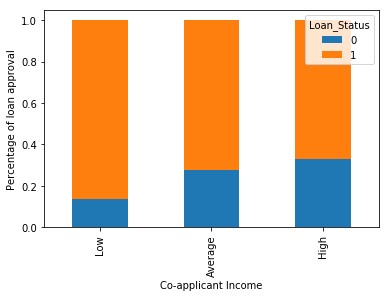

In [41]:
# plot in stacked bar for loan status
Coapplicant_Income_range = pd.crosstab(data['Coapplicant_Income_range'],data['Loan_Status'])
Coapplicant_Income_range.div(Coapplicant_Income_range.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Co-applicant Income')
P = plt.ylabel('Percentage of loan approval')

- It shows that the chances of loan approval are high if coapplicant’s income is low . But this is surprising and does not look right with respect to loan approval. 
- The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
- So we can combine the applicant’s and coapplicant’s income into Total income to visualize the combined effect of income on loan approval.

##### Total analyze effect to total income i.e. applicant's income + co-applicant's income lets add them together and plot

In [42]:
# Get total income
data['Income_Total'] = data['Applicant_Income'] + data['Coapplicant_Income']

# Divide into range for analysis
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
data['Income_Total_range'] = pd.cut(data['Income_Total'], bins, labels=group)

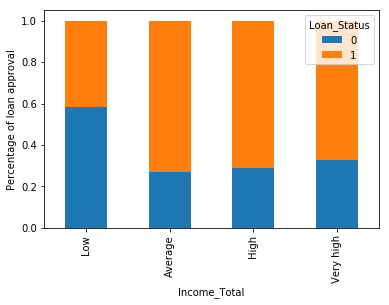

In [43]:
# plot in stacked bar for loan status
Income_Total_range = pd.crosstab(data['Income_Total_range'],data['Loan_Status'])
Income_Total_range.div(Income_Total_range.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Income_Total')
P = plt.ylabel('Percentage of loan approval')

- From above results for total income, we can see that the chances of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.
- **This supports our 1st hypotheis assumption that chances of approval of loan are higher for applicants with high income.**
***

#### Note - Hypothesis of Loan Amount that "chances of approval of loan are higher for applicants with less loan amount applied for." will be checked here

##### Analyze Loan amount variable

In [44]:
# Divide into range for analysis
bins = [0,100,200,700]
group = ['Low','Average','High']
data['Loan_Amount_range']=pd.cut(data['Loan_Amount'], bins ,labels=group)

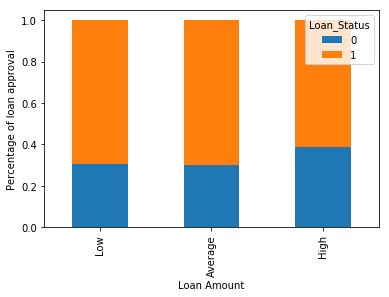

In [45]:
# plot in stacked bar for loan status
Loan_Amount_range=pd.crosstab(data['Loan_Amount_range'],data['Loan_Status'])
Loan_Amount_range.div(Loan_Amount_range.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage of loan approval')

- **The results from above plot supports our 2nd hypotheis in which we considered that when the loan amount is low the chances of loan approval will be high.**
- As the percentage of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount.
***

#### Note - Hypothesis of Loan Term that "chances of approval of loan are higher for applicants who applied for less time period and less amount." will be checked here

##### Analyse Loan_Amount_Term variable

In [46]:
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
# Divide into range for analysis
bins = [0,120,240,400]
group = ['Short_Term','Medium_Term','Long_Term']
data['Loan_Amount_Term_range']=pd.cut(data['Loan_Amount_Term'], bins ,labels=group)

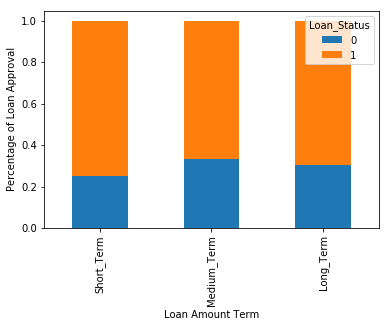

In [48]:
# Plot in stacked bar for loan status
Loan_Amount_Term_range=pd.crosstab(data['Loan_Amount_Term_range'],data['Loan_Status'])
Loan_Amount_Term_range.div(Loan_Amount_Term_range.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount Term')
P = plt.ylabel('Percentage of Loan Approval')

- **The results from above plot supports our 3rd hypotheis in which we considered that the chances of approval of loan are higher for applicants who applied for less time period and less amount.**
- As the percentage of approved loans is higher for Short term loan apllications as compared to Mediun and Long term.
***

#### Correlation Plot

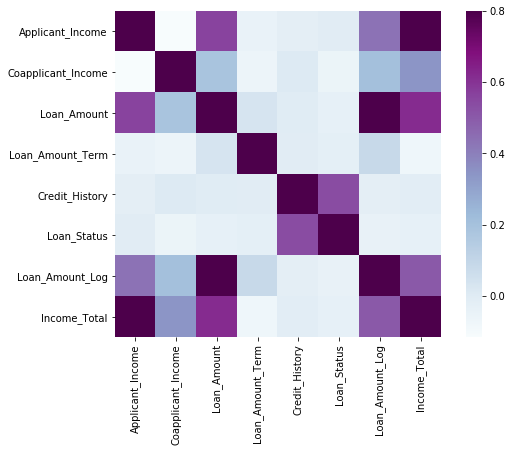

In [49]:
# Correlation plot for analysis
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

-We see that the most correlated variables are (Applicant_Income - Loan_Amount) and (Credit_History - Loan_Status). Loan_Amount is also correlated with Coapplicant_Income.
***

## 5. Predictive Analysis

I am going to build prediction model for target variable Loan_Status. Before builinding any model we have to take several steps such as dropping unwanted features, changing categorical variables into 0 and 1, getting target variable in separate dataset etc. So lets do that first

In [50]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Log,Income_range,Coapplicant_Income_range,Income_Total,Income_Total_range,Loan_Amount_range,Loan_Amount_Term_range
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,High,NaN,5849.0,High,Average,Long_Term
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,High,Average,6091.0,Very high,Average,Long_Term
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,Average,NaN,3000.0,Average,Low,Long_Term
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,Average,Average,4941.0,High,Average,Long_Term
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,High,NaN,6000.0,High,Average,Long_Term


In [51]:
# Drop unwanted columns
data = data.drop(['Income_range', 'Coapplicant_Income_range', 'Income_Total', 'Income_Total_range', 'Loan_Amount_range','Loan_Amount_Term_range'], axis=1)

In [52]:
# Get target variable in separate dataset  
X = data.drop('Loan_Status',axis=1)
y = data.Loan_Status

In [53]:
# Change categorical variables into 0 and 1
X=pd.get_dummies(X)
data=pd.get_dummies(data)
test=pd.get_dummies(test)

In [54]:
# Split dataset - stratified
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

### Logistic Regression model

- As our goal is to predict if loan will be approved for a particulat loan ID or not, I am using Logistic Regression is a classification algorithm which is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [55]:
# Logistic Reg without stratified k fold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)  
print(f'Accuracy score for Logistic Regression is {acc:.3f}')  

Accuracy score for Logistic Regression is 0.781


So our predictions are almost 82% accurate. This means that, we have identified 82% of the loan status correctly.

### Using Cross Validation

- Cross Validation is used to examine the predictive performance of the models and and to judge how they perform when when a new data also known as test dataset is provided outside of the sample on which model was fitted.
- In **k-fold cross-validation**, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.


1 of Kfold 5
Accuracy_Score 0.798

2 of Kfold 5
Accuracy_Score 0.831

3 of Kfold 5
Accuracy_Score 0.811

4 of Kfold 5
Accuracy_Score 0.795

5 of Kfold 5
Accuracy_Score 0.828

 Mean accuracy score is 0.813


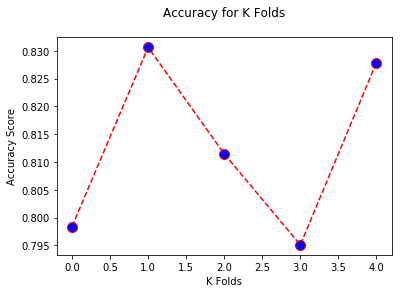

In [56]:
# Logistics reg. with stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold

i=1
acs = []
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in skf.split(X, y):
    print('\n{} of Kfold {}'.format(i,skf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LogisticRegression(random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print(f'Accuracy_Score {acc:.3f}')
    acs.append(acc)
    i+=1

# Plot result for each fold
plt.plot(acs, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy for K Folds''\n')  
plt.xlabel('K Folds')  
plt.ylabel('Accuracy Score')

# Print mean 
print(f'\n Mean accuracy score is {np.mean(acs):.3f}')

- Above result show accuracy score for each k-fold along with the mean accuracy of about 81%. This means that, we have identified 81% of the loan status correctly.
- Now we can use this model to predict values of test dataset which we kept separately at start.

In [57]:
# Predictions for test dataset
pred_test = clf.predict(test)

In [58]:
# Reading file to write predictions resulted above
result = pd.read_csv('Predictions.csv')
result['Loan_Status'] = pred_test
result['Loan_ID'] = test_original['Loan_ID']

In [59]:
# Replace 0 with N and 1 with Y
result['Loan_Status'].replace(0, 'N',inplace=True)
result['Loan_Status'].replace(1, 'Y',inplace=True)

In [60]:
# Generate new logistics.csv file
pd.DataFrame(result, columns=['Loan_ID','Loan_Status']).to_csv('logistic_predictions.csv')

- In the logistic_predictions.csv file we have predicted Loan_Status as 'Y' or 'N' for the Loan_IDs in original dataset. The choice of logistic regression classifier was good for this model as we achieved almost 81% of accuracy and logistics regression is best choice when it comes to predict a binary outcomes.

## Conclusion

- In conclusion, in this project to achieve the goal (given in problem statement) I performed:
 1. Data extraction and exploration
 2. Data cleanup and preparation
 3. Data Visualization
 4. Descriptive analysis along with hypothesis generation
 5. Predictive analysis


- I was able to find out which factors affect the loan approval the most and was able to automate the process to identify the customers' segments, those who are eligible for loan payment so that the bank can specifically focus these eligible customers using prediction model.


- The results I got from my descriptive analysis supported my hypothesis I generated about the data. It shows that Loan Amount, Loan Term and Credit History play major role when deciding to approve loan of a customer. 


- However, Applicant Income trends were surprising along with co-applicant income trends, as it displayed that low income has high chance of getting loan approved. While in reality this should not be a case normally. But this assumption was satisfied when applican't income and co-applicant's income are combined together.


- And the result from my predictive analysis present in logistic_predictions.csv file provide loan ids for which loan can be approved based on feature values provided for them.
***

**References:**
- Analytics Vidya. (n.d.). Practice Problem: Loan Prediction III | Knowledge and Learning. Retrieved December 13, 2018, from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
- Cross-validation (statistics). (2018, December 06). Retrieved December 13, 2018, from https://en.wikipedia.org/wiki/Cross-validation_(statistics)
- How to Handle Missing Data with Python. (2018, March 10). Retrieved December 13, 2018, from https://machinelearningmastery.com/handle-missing-data-python/
- Albon, C. (2017, December 20). Missing Data In pandas Dataframes. Retrieved December 13, 2018, from https://chrisalbon.com/python/data_wrangling/pandas_missing_data/
- What is Logistic Regression? (n.d.). Retrieved December 13, 2018, from https://www.statisticssolutions.com/what-is-logistic-regression/
    